# Outline and Visualization of an Active Inference Model of Open Source Development Community

Here we'll use Active Inference to make a model of an Open Source Development Community (OSDC).

First we'll outline the model as clearly as possible, then implement that model in code.

# Model Outline

## Model Inspiration

We'll assume that the agents in the Open Source Development Community (OSDC) can be modeled as Agents of a Collective Intelligence, inspired and informed by ["An Active Inference Model of Collective Intelligence"](https://doi.org/10.3390/e23070830)
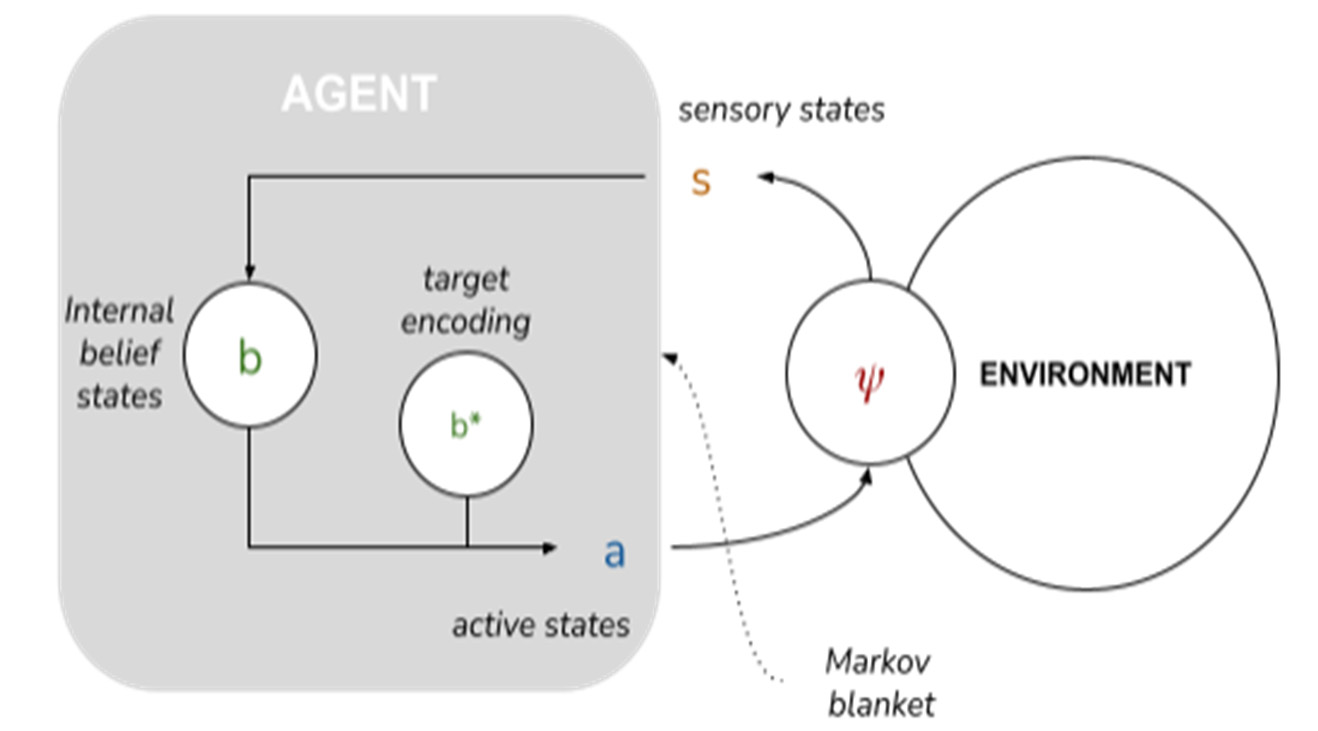


Citation:
Kaufmann, R.; Gupta, P.; Taylor, J. An Active Inference Model of Collective Intelligence. Entropy 2021, 23, 830. https://doi.org/10.3390/e23070830

Unlike many of the publicly available Active Inference (AIF) models, our model of the OSDC does not take place in any kind of physical environment, simulated or otherwise. No "grid-world" or even "motion" plays into our model of the OSDC, there are no physical analogues to what we are dealing with.

Therefore, our States and Observations for each AIF agent require a certain amount of imagination. Starting again with Kaufmann et al, (page 7, specifically), we will look at the agent's "Cognitive Capabilities" - however any mention of a 'position' will have to be construed as the agent's place in the community. Not their 'role' necessarily, but where they are in relationship to completing their goals.

Here are the "Cognitive Capabilities" from Kaufmann et al, paraphrased:
-    Beliefs about their own current position ('self-actualization loop')
-    Desires/desired beliefs about their own position relative to target positions
-    Ability to select the actions that will best 'satisfy' their desires
-    Beliefs about their partners' positions, desires, and the actions that their partners are expected to take ('Theory of Mind' or 'partner-actualization loop')
-    Ability to alter their own desires to be more compatible with their partners' ('Goal Alignment')

## OSDC Specific Model Description

### OSDC Agents and their Affordances

With an Active Inference model we don't need to be (as) reductive with our model as with other formulations.

Each agent in our OSDC will have the following affordances (behaviors in AIF language):
*    Creative Affordances
     -    Commit Code
     -    Create Branch
     -    Create Issues
*    Alteration Affordances
     -    Submit Pull Request (PR)
     -    Approve PR
     -    Close Issue
     -    Delete Branch
*    Social Affordances
     -    Comment on Issue
     -    Comment on PR
     -    Request Changes on PR

### OSDC Agents and their States

The 'state' of an agent in an OSDC is again informed by Kaufmann et al's ideas about "State Space" but again, without any explicit physical environment analogue, instead using the idea of an agent's contributions.

*    External state of agent, location in the multi-dimensional space of the OSDC community of the agent's contributions
*    Sensory state of agent, perceived difference between agent's contributions and those of other agents
*    Internal belief state about its own position (actual and desired) and beliefs about the positions of other agents.
*    Action state, which affordance it is currently engaging with

### OSDC Agents and their Observations

Each agent in the OSDC has, theoretically, the same access to the same information. However, in practice, we cannot assume that all agents will look through all the code, all the issues, all the pull requests, etc. This will therefore affect the observations that each agent is afforded.

By imagining an agent's perspective, we will assume that agents whose contributions make up a more substantial part of the OSDC will be more fastidious about following up with other agents' work, especially in relation to their own.

This is part of the "contribution-location" (Beitragsort? there's always a German word for these sorts of things) which I proposed extraordinarily briefly above. We will flesh this out more soon enough, but we'll assume that an agent's observations are tied in some way to their "contribution-location" and that there is a "horizon" to that location (many contributions make up a mountain, derailing contributions make a hole).

*    Contribution-location in relation to other agents, the landscape of the OSDC
*    Code/Components which have been completed and their relationship to the shared goals of the OSDC
*    Of the affordances available, are there any which require or invite action? (Are there Open PRs which can be approved? Branches which can be merged?)

### Contribution-Location

For the purposes of visualization and so that we can be as clear as possible in differentiating the agents, we will define the Beitragsort, the Contribution-Location.

Two axes comprise an efficiency index, which represents how efficient an agent is in their work, with "quality" on one axis and "quantity" on the other.

Another axis is an engagement index, which represents how much an agent engages with other agents.

It is important for our model that the index is calculated for each agent at each time step. Then we can view their two-dimensional contribution location in a landscape which evolves over time.

# A Brief Example/Visualization

## Explanation

The example we are about to see is a visualization of the contribution-space of a software development organization.

It can be viewed as a 2-dimensional efficiency point (with quantity of contributions on one axis and quality/usefulness of contributions on the other), or a 3-dimensional point in which an engagement index provides the z-axis.

### Efficiency Index Points

Each Efficiency Index Point is calculated using a flexible function which takes in GitHub information (and possibly other information) and finds two values between 0.0 and 1.0:
*    Quantity of information - how much an agent has contributed to the repository/to the organization
    -    unique code contributions in GitHub commits
    -    issues, pull requests, and branch creations
*    Quality of information - here "quality" is a rhetorical device, we instead look for how often unique code contributions of the agent are referenced
    -    reference by other code (how often a function is called, a global invoked, etc)
    -    whether it required changes, and how many, over time

### Engagement Index Values

Each Engagement Index Value is calculated using another function which takes in GitHub information and finds one value between 0.0 and 1.0:
*    Comments on issues, pull requests, discussion, etc
*    Stars, forks, watches, and other social affordances used


## Code for Visualization

### Imports and Helper Functions

In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import scipy
from scipy.stats import binom

In [4]:
# Hello World
#fig = plt.figure()
#ax = plt.axes(projection='3d')

In [5]:
# Function to display Contribution Location
def display_contrib_location(efficiency,engagement):
  ax = plt.axes(projection='3d')
  # Data for three-dimensional scattered points
  zdata = engagement
  xdata = efficiency[0]
  ydata = efficiency[1]
  print(f"We're looking at {xdata}, {ydata}, and {zdata}")
  ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Dark2');

In [6]:
import plotly.express as px

def animate_plotly(df,xlabel,ylabel,frame,group,size,color,name):
    plot = px.scatter(df, x=xlabel, y=ylabel, animation_frame=frame, animation_group=group,
           size=size, color=color, hover_name=name,
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
    return plot

### Animation examples

In [11]:
import plotly.express as px

df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [20]:
!pip3 install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 508 kB 8.2 MB/s 
     |████████████████████████████████| 11.2 MB 26.7 MB/s 
     |████████████████████████████████| 944 kB 58.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


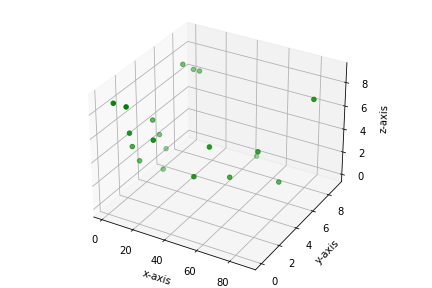

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
      44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]
  
ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
      5, 2, 4, 1, 8, 7, 0, 5]
  
zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2, 
      3, 4, 5, 6, 7, 8, 9, 0]
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')
  
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

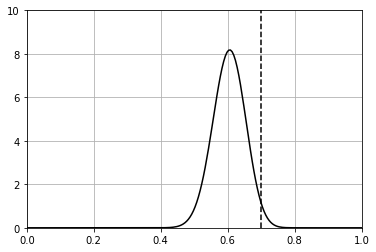

In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

def beta_pdf(x, a, b):
    return (x**(a-1) * (1-x)**(b-1) * math.gamma(a + b)
            / (math.gamma(a) * math.gamma(b)))


class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.success = 0
            self.line.set_data([], [])
            return self.line,

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=100, interval=100, blit=True)
#plt.show()

anim

AttributeError: ignored

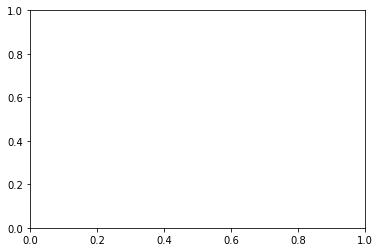

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

line_ani

### Some examples

We're looking at [0.2, 0.5, 0.3], [0.6, 0.3, 0.4], and [0.5, 0.2, 0.1]


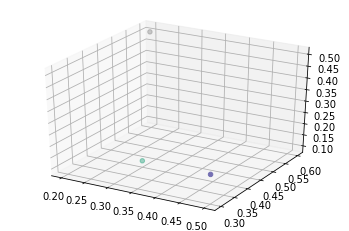

In [ ]:
# 1 Dot plot, we plot some dots
# Efficiency Points of 3 different agents
efficiency_history = [[0.2,0.5,0.3],
                      [0.6,0.3,0.4]]

# Engagement values of 3 different agents
engagement_history = [0.5,0.2,0.1]

if len(efficiency_history[0]) == len(engagement_history):
  display_contrib_location(efficiency_history, engagement_history)
else:
  print(f"Whoops our agents are out of sync\nEfficiency is {len(efficiency_history)} steps long\nEngagement is {len(engagement_history)} steps long")

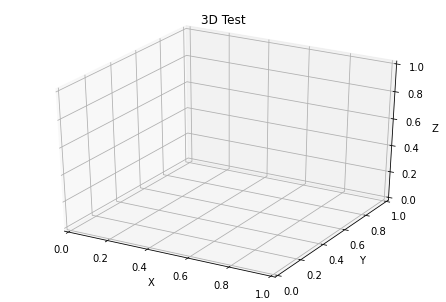

In [ ]:
# We implement time steps and animate

# here we use `get_distributions(time_steps, dims=3)` to get random binomial distributions for our data
time_steps = 10
agents = 3
data = [get_distributions(time_steps) for index in range(agents)]
anim = animate_locations(data)
anim